<a href="https://colab.research.google.com/github/mayankjain281/Supervised_Machine_Learning/blob/main/Smartwatch_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('Smart watch prices.csv')
df

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159


# Data Preprocessing Part 1

In [ ]:
#Check ther number of unique value
df.select_dtypes(include='object').nunique()

Brand                         42
Model                        137
Operating System              35
Connectivity                   5
Display Type                  27
Resolution                    36
Water Resistance (meters)      7
Battery Life (days)           30
Heart Rate Monitor             1
GPS                            2
NFC                            2
Price (USD)                   50
dtype: int64

# Remove unnecessary columns

In [ ]:
# Remove Heart Rate Monitor because it only has 1 unique value
df.drop(columns=['Model','Heart Rate Monitor'], inplace=True)
df.shape

(379, 11)

# Remove duplicate rows

In [ ]:
df[df.duplicated()].sort_values('Brand').head()

,Brand,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),GPS,NFC,Price (USD)
357,Amazfit,Amazfit OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,24,Yes,Yes,$139
140,Amazfit,Amazfit OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,14,Yes,Yes,$179
249,Amazfit,Amazfit OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,14,Yes,Yes,$179
367,Amazfit,Amazfit OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,14,Yes,Yes,$179
336,Amazfit,Amazfit OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,14,Yes,Yes,$179


In [ ]:
df.duplicated().sum()

85

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(294, 11)

# Handling missing values

In [ ]:
df.isna().sum()

Brand                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.shape

(289, 11)

# Remove Dollar and Comma from Price (USD)

In [ ]:
#remove '$' and comma from Price(USD) column
df['Price (USD)'] = df['Price (USD)'].str.replace(',', '').str.replace('$', '')

# Convert the Price(USD) column to numeric values
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'])
df.head()

<ipython-input-120-cca291bb8f56>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price (USD)'] = df['Price (USD)'].str.replace(',', '').str.replace('$', '')


,Brand,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),GPS,NFC,Price (USD)
0,Apple,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,399
1,Samsung,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,249
2,Garmin,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,No,399
3,Fitbit,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,229
4,Fossil,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,299


In [ ]:
df.dtypes

Brand                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
GPS                           object
NFC                           object
Price (USD)                    int64
dtype: object

# Segment the Operating System

In [ ]:
df['Operating System'].unique()

array(['watchOS', 'Wear OS', 'Garmin OS', 'Fitbit OS', 'HarmonyOS',
       'ColorOS', 'Amazfit OS', nan, 'Withings OS', 'Polar OS',
       'Tizen OS', 'Hybrid OS', 'Lite OS', 'Tizen', 'Suunto OS',
       'Proprietary OS', 'Proprietary', 'LiteOS', 'Android Wear',
       'MIUI for Watch', 'Custom OS', 'Fossil OS', 'MIUI', 'RTOS',
       'MyKronoz OS', 'Nubia OS', 'Mi Wear OS', 'Zepp OS', 'Realme OS',
       'Matrix OS', 'Android OS', 'Casio OS', 'Skagen OS', 'Timex OS',
       'MIUI For Watch', 'Android'], dtype=object)

In [ ]:
df['Operating System'].value_counts()

Wear OS           131
Garmin OS          34
Lite OS            26
Fitbit OS          24
Amazfit OS         19
watchOS            14
Tizen OS           14
Proprietary OS     12
Polar OS           11
Proprietary         9
Suunto OS           9
Android Wear        9
ColorOS             7
Withings OS         6
Zepp OS             5
Tizen               4
LiteOS              4
Timex OS            4
Casio OS            4
HarmonyOS           3
Custom OS           3
Fossil OS           3
Android OS          3
Matrix OS           2
Realme OS           2
MyKronoz OS         2
MIUI                2
MIUI for Watch      2
Android             2
Mi Wear OS          1
Nubia OS            1
Hybrid OS           1
RTOS                1
Skagen OS           1
MIUI For Watch      1
Name: Operating System, dtype: int64

In [ ]:
# filter series based on value

df['Operating System'].value_counts().loc[lambda x : x > 10]

Wear OS           131
Garmin OS          34
Lite OS            26
Fitbit OS          24
Amazfit OS         19
watchOS            14
Tizen OS           14
Proprietary OS     12
Polar OS           11
Name: Operating System, dtype: int64

In [ ]:
# Or filter Top n value of series

df['Operating System'].value_counts().head(9)

Wear OS           131
Garmin OS          34
Lite OS            26
Fitbit OS          24
Amazfit OS         19
watchOS            14
Tizen OS           14
Proprietary OS     12
Name: Operating System, dtype: int64

In [ ]:
def segment_os(os):
    if os not in df['Operating System'].value_counts().head(9).index.to_list():
      return 'Other'
    else:
      return os

df['Operating System'] = df['Operating System'].apply(segment_os)

<Axes: >

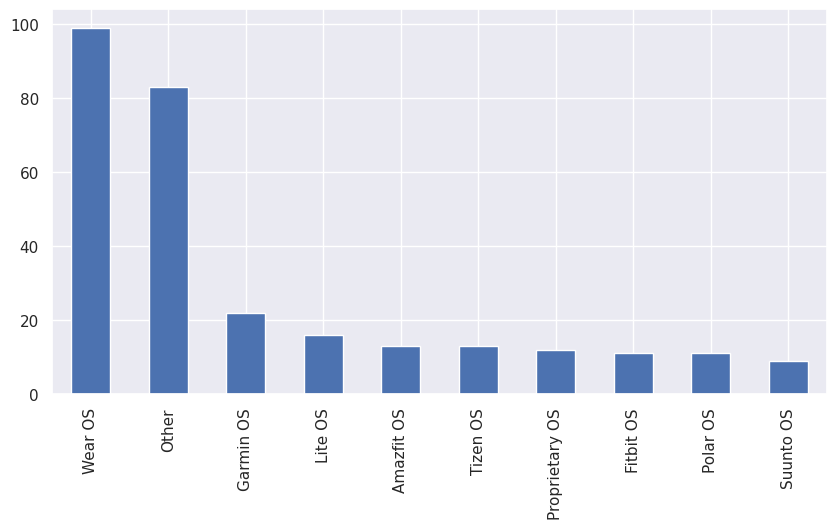

In [ ]:
plt.figure(figsize=(10,5))
df['Operating System'].value_counts().plot(kind='bar')

# Segment the Display Type

In [ ]:
df['Display Type'].unique()

array(['Retina', 'AMOLED', 'IPS LCD', 'TFT LCD', 'Memory-in-pixel (MIP)',
       'Super AMOLED', 'LCD', 'Transflective', 'OLED', 'Gorilla Glass',
       'MIP', 'P-OLED', 'transflective', 'PMOLED', 'TFT',
       'Sunlight-visible, transflective memory-in-pixel (MIP)', 'E-Ink',
       'E-ink', 'Sunlight-visible', 'Color Touch', 'IPS', 'Dual Layer',
       'TFT-LCD', 'STN LCD', 'Monochrome', 'Memory LCD'], dtype=object)

In [ ]:
df['Display Type'].value_counts()

AMOLED                                                   152
LCD                                                       23
Transflective                                             22
OLED                                                      16
Super AMOLED                                              16
TFT LCD                                                    9
Retina                                                     7
PMOLED                                                     7
IPS LCD                                                    7
E-Ink                                                      6
P-OLED                                                     3
Monochrome                                                 3
IPS                                                        2
MIP                                                        2
transflective                                              2
Sunlight-visible, transflective memory-in-pixel (MIP)      2
Memory-in-pixel (MIP)   

In [ ]:
def segment_display_type(display_type):
    if display_type not in df['Display Type'].value_counts().head(9).index.to_list():
      return 'Other'
    else:
      return display_type

df['Display Type'] = df['Display Type'].apply(segment_display_type)

<Axes: >

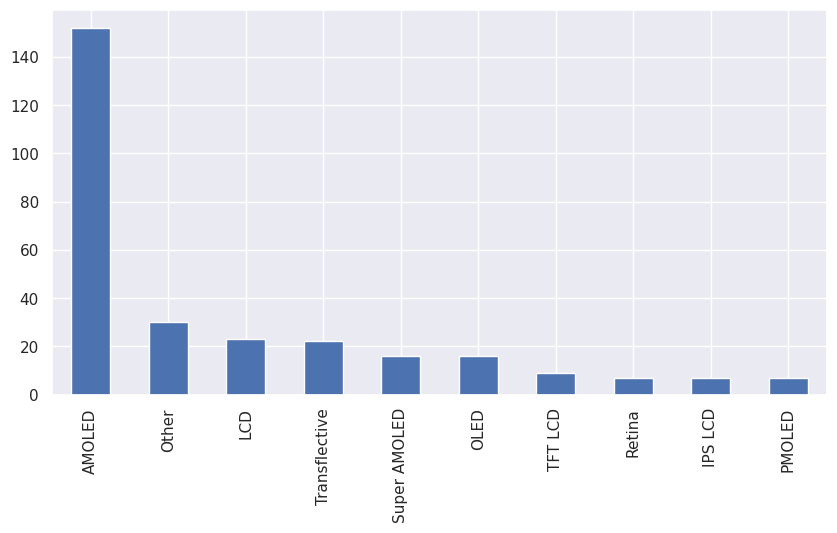

In [ ]:
plt.figure(figsize=(10,5))
df['Display Type'].value_counts().plot(kind='bar')

# Segment the Brand

In [ ]:
df['Brand'].unique()

array(['Apple', 'Samsung', 'Garmin', 'Fitbit', 'Fossil', 'Huawei',
       'TicWatch', 'Oppo', 'Amazfit', 'Skagen', 'Withings', 'Timex',
       'Suunto', 'Mobvoi', 'Polar', 'Ticwatch', 'Xiaomi', 'Honor', 'LG',
       nan, 'Casio', 'OnePlus', 'Misfit', 'Moto', 'MyKronoz', 'Nubia',
       'Sony', 'Zepp', 'Realme', 'Matrix', 'Kate Spade', 'Diesel',
       'Michael Kors', 'Zeblaze', 'Kospet', 'Lemfo', 'TAG Heuer',
       'Montblanc', 'Asus', 'Emporio Armani', 'Polaroid', 'Motorola',
       'Nokia'], dtype=object)

In [ ]:
def segment_brand(brand):
    if brand not in df['Brand'].value_counts().head(9).index.to_list():
      return 'Other'
    else:
      return brand

df['Brand'] = df['Brand'].apply(segment_brand)

<Axes: >

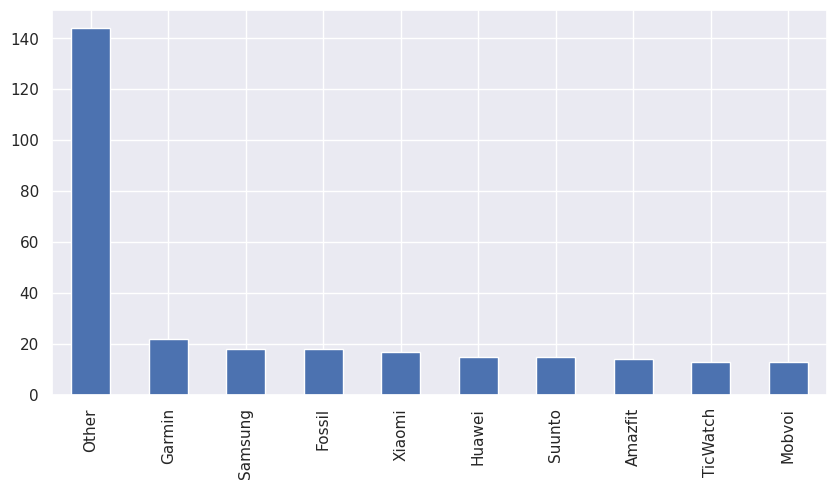

In [ ]:
plt.figure(figsize=(10,5))
df['Brand'].value_counts().plot(kind='bar')

# Segment the Resolution

In [ ]:
df.Resolution.value_counts()

454 x 454    64
360 x 360    44
240 x 240    40
390 x 390    33
400 x 400    15
416 x 416    11
328 x 328     8
320 x 320     7
372 x 430     5
348 x 442     5
320 x 300     4
128 x 128     4
280 x 280     4
176 x 176     4
480 x 480     4
336 x 336     4
368 x 448     4
348 x 250     3
300 x 300     3
280 x 456     3
324 x 394     2
228 x 172     2
160 x 160     2
402 x 476     2
126 x 36      1
320 x 302     1
260 x 260     1
396 x 484     1
960 x 192     1
240 x 198     1
200 x 200     1
450 x 450     1
240 x 201     1
394 x 324     1
466 x 466     1
326 x 326     1
Name: Resolution, dtype: int64

In [ ]:
def segment_resolution(resolution):
    if pd.isnull(resolution):
        return 'Unknown'
    res = resolution.split(' x ')
    width = int(res[0])
    height = int(res[1])
    if width < 200 or height < 200:
        return 'Low'
    elif width < 400 or height < 400:
        return 'Medium'
    elif width < 800 or height < 800:
        return 'High'
    else:
        return 'Very high'

df['Resolution'] = df['Resolution'].apply(segment_resolution)

<Axes: >

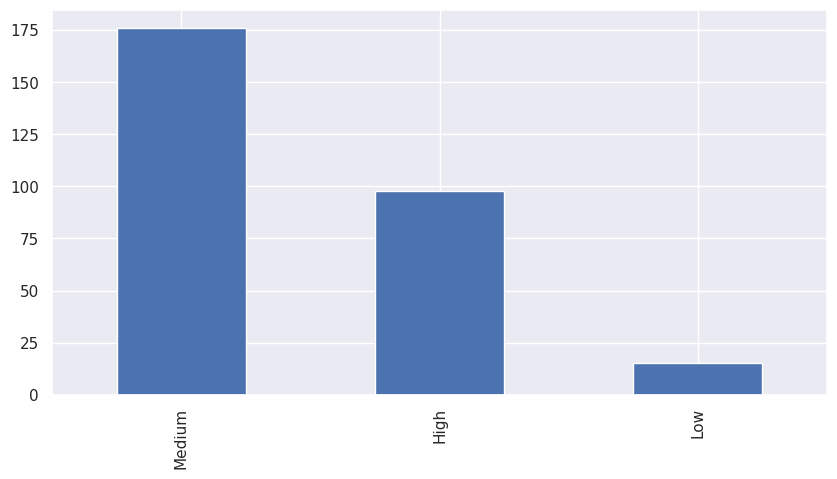

In [ ]:
plt.figure(figsize=(10,5))
df['Resolution'].value_counts().plot(kind='bar')

# Segment Battery Life Days

In [ ]:
df['Battery Life (days)'].value_counts()

14           64
2            49
3            20
1            18
24           18
5            16
1.5          10
16           10
25            9
30            9
18            8
7             8
4             8
6             7
10            4
15            4
9             4
45            4
Unlimited     3
20            2
40            2
12            2
72            2
70            2
11            1
56            1
48 hours      1
60            1
48            1
8             1
Name: Battery Life (days), dtype: int64

In [ ]:
def segment_battery_life(battery_life):
    if pd.isnull(battery_life):
        return 'Unknown'
    elif battery_life == '48 hours':
        return '1-10'
    elif battery_life == '1.5':
        return '1-10'
    elif battery_life == 'Unlimited':
        return '>30'
    else:
        try:
            days = int(battery_life)
            if days >= 1 and days <= 10:
                return '1-10'
            elif days >= 11 and days <= 20:
                return '11-20'
            elif days >= 21 and days <= 30:
                return '21-30'
            else:
                return '>30'
        except ValueError:
            return 'Unknown'

df['Battery Life (days)'] = df['Battery Life (days)'].apply(segment_battery_life)

<Axes: >

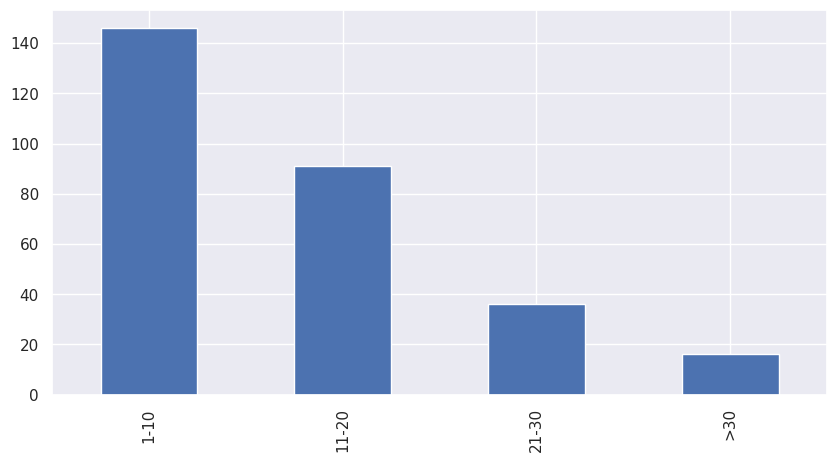

In [ ]:
plt.figure(figsize=(10,5))
df['Battery Life (days)'].value_counts().plot(kind='bar')

# Segment Water Resistance (meters)

In [ ]:
df['Water Resistance (meters)'].value_counts()

50               203
30                50
100               24
200                8
1.5                2
Not specified      1
10                 1
Name: Water Resistance (meters), dtype: int64

In [ ]:
def segment_water_resistance(water_resistance):
    if water_resistance not in df['Water Resistance (meters)'].value_counts().head(3).index.to_list():
      return '200'
    else:
      return water_resistance
        
        
df['Water Resistance (meters)'] = df['Water Resistance (meters)'].apply(segment_water_resistance)

<Axes: >

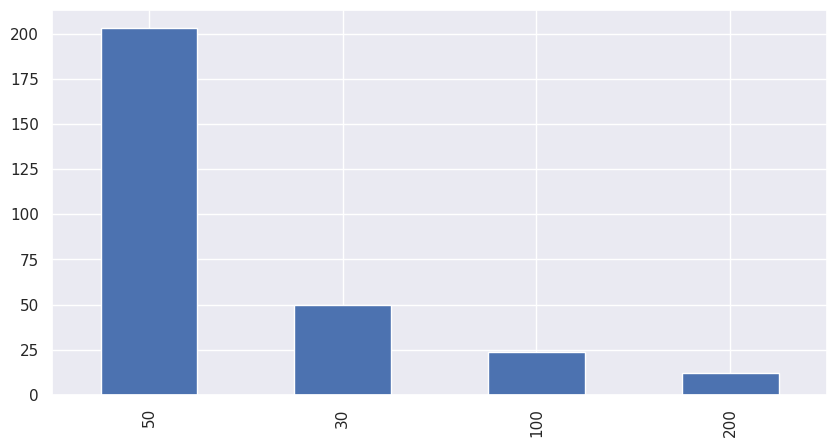

In [ ]:
plt.figure(figsize=(10,5))
df['Water Resistance (meters)'].value_counts().plot(kind='bar')

# Exploratory Data Analysis

In [ ]:
#Check ther number of unique value
df.select_dtypes(include='object').nunique()

Brand                        10
Operating System             10
Connectivity                  5
Display Type                 10
Resolution                    3
Water Resistance (meters)     4
Battery Life (days)           4
GPS                           2
NFC                           2
dtype: int64

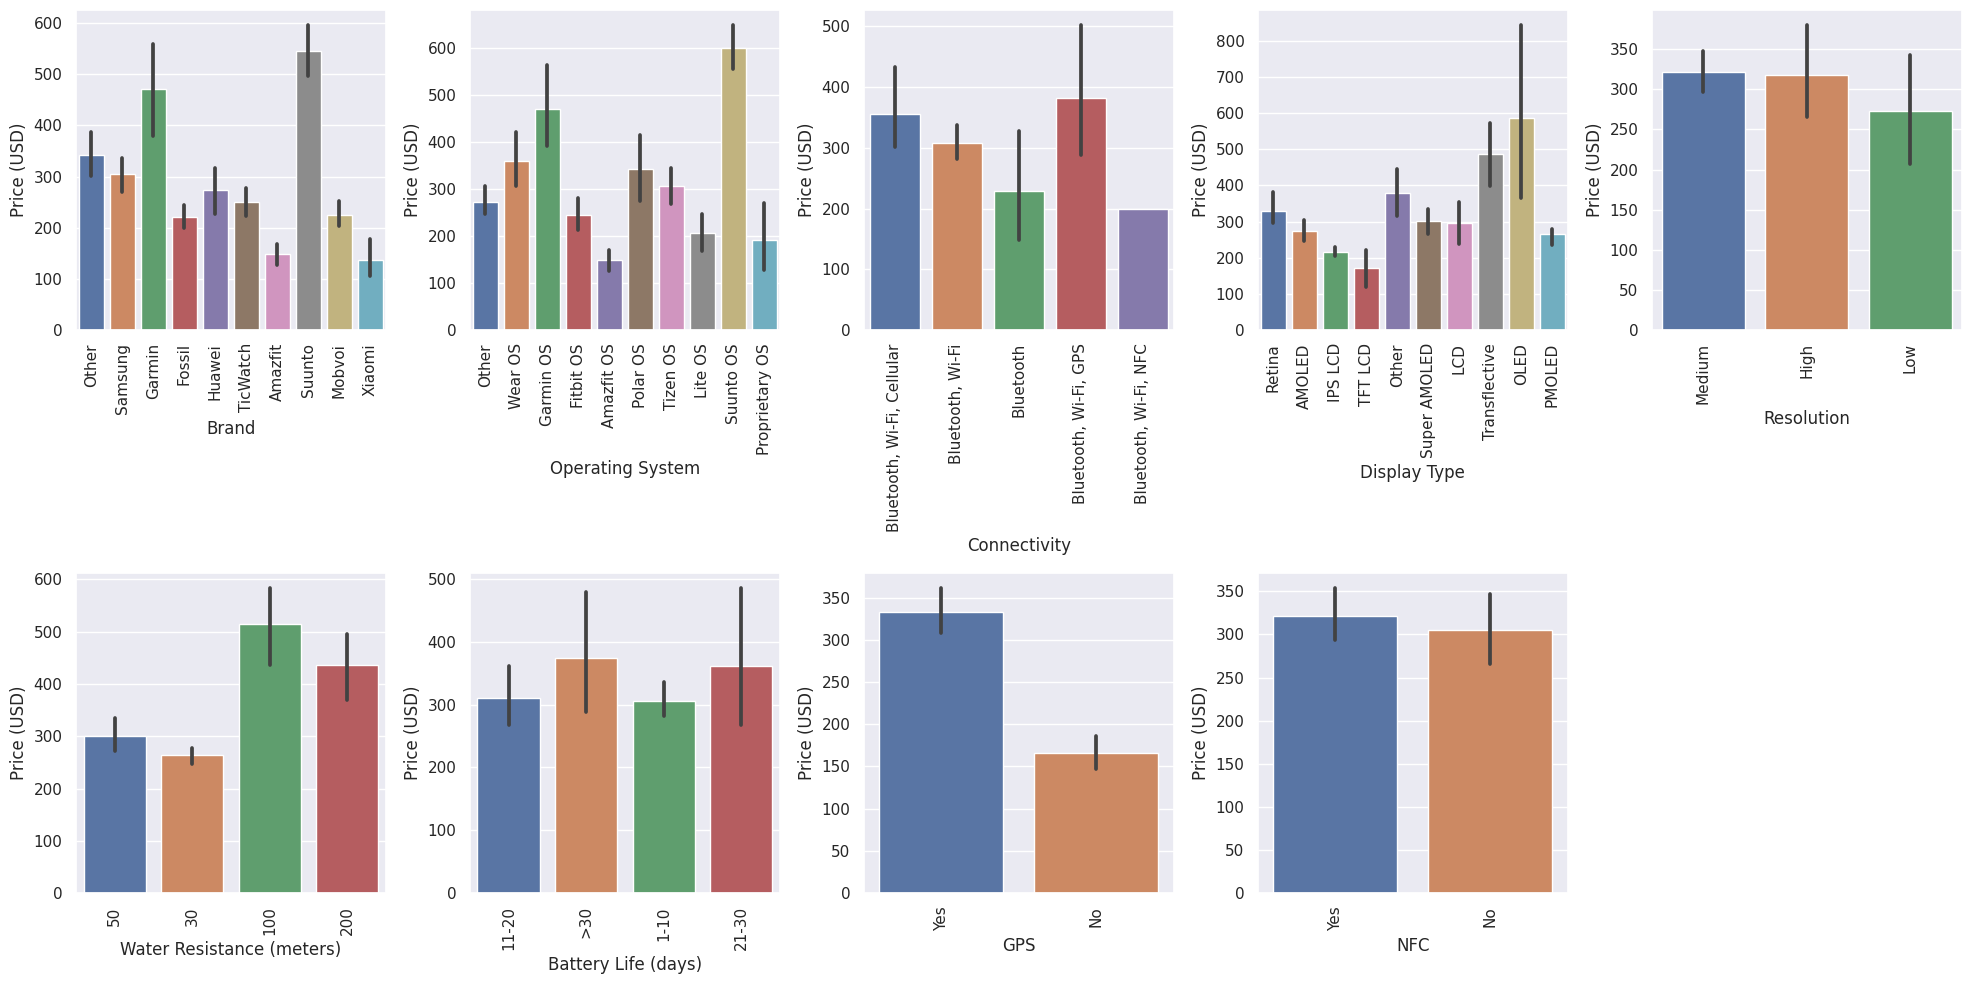

In [ ]:
# list of categorical variables to plot
cat_vars = ['Brand', 'Operating System', 'Connectivity', 'Display Type', 'Resolution', 
            'Water Resistance (meters)', 'Battery Life (days)', 'GPS', 'NFC']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price (USD)', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the tenth subplot
fig.delaxes(axs[9])

# show plot
plt.show()

# Label Encoding for Object datatypes

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

# Removing Outliers using Z-Score

<Axes: xlabel='Display Size (inches)'>

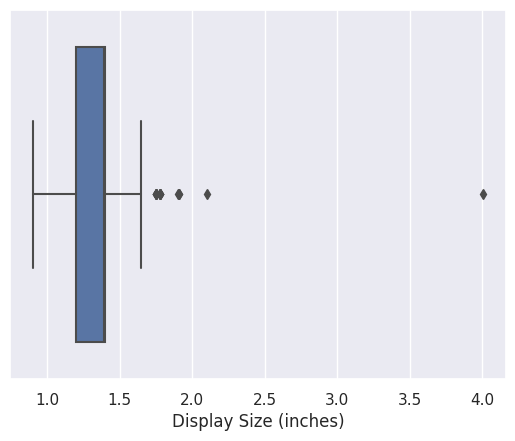

In [ ]:
sns.boxplot(x=df["Display Size (inches)"])

<Axes: xlabel='Display Size (inches)', ylabel='Count'>

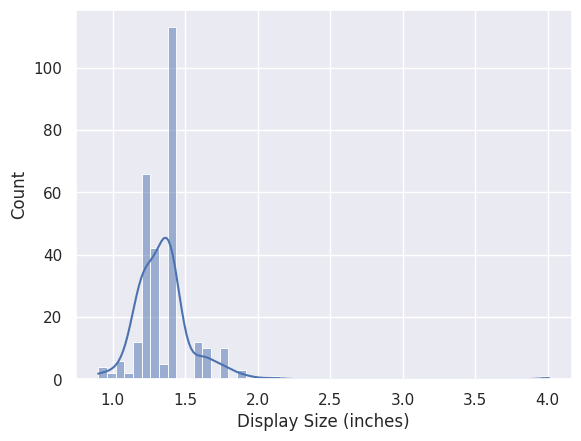

In [ ]:
sns.histplot(data=df, x="Display Size (inches)",kde=True)

In [ ]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df[col]))
        # remove rows with z-score greater than threshold in selected column
        df = df[(z < threshold) | (df[col].isnull())]
    return df

In [ ]:
selected_cols = ['Display Size (inches)']
df_clean = remove_outliers(df, selected_cols)
df_clean.shape

(287, 11)

# Correlation Heatmap

<Axes: >

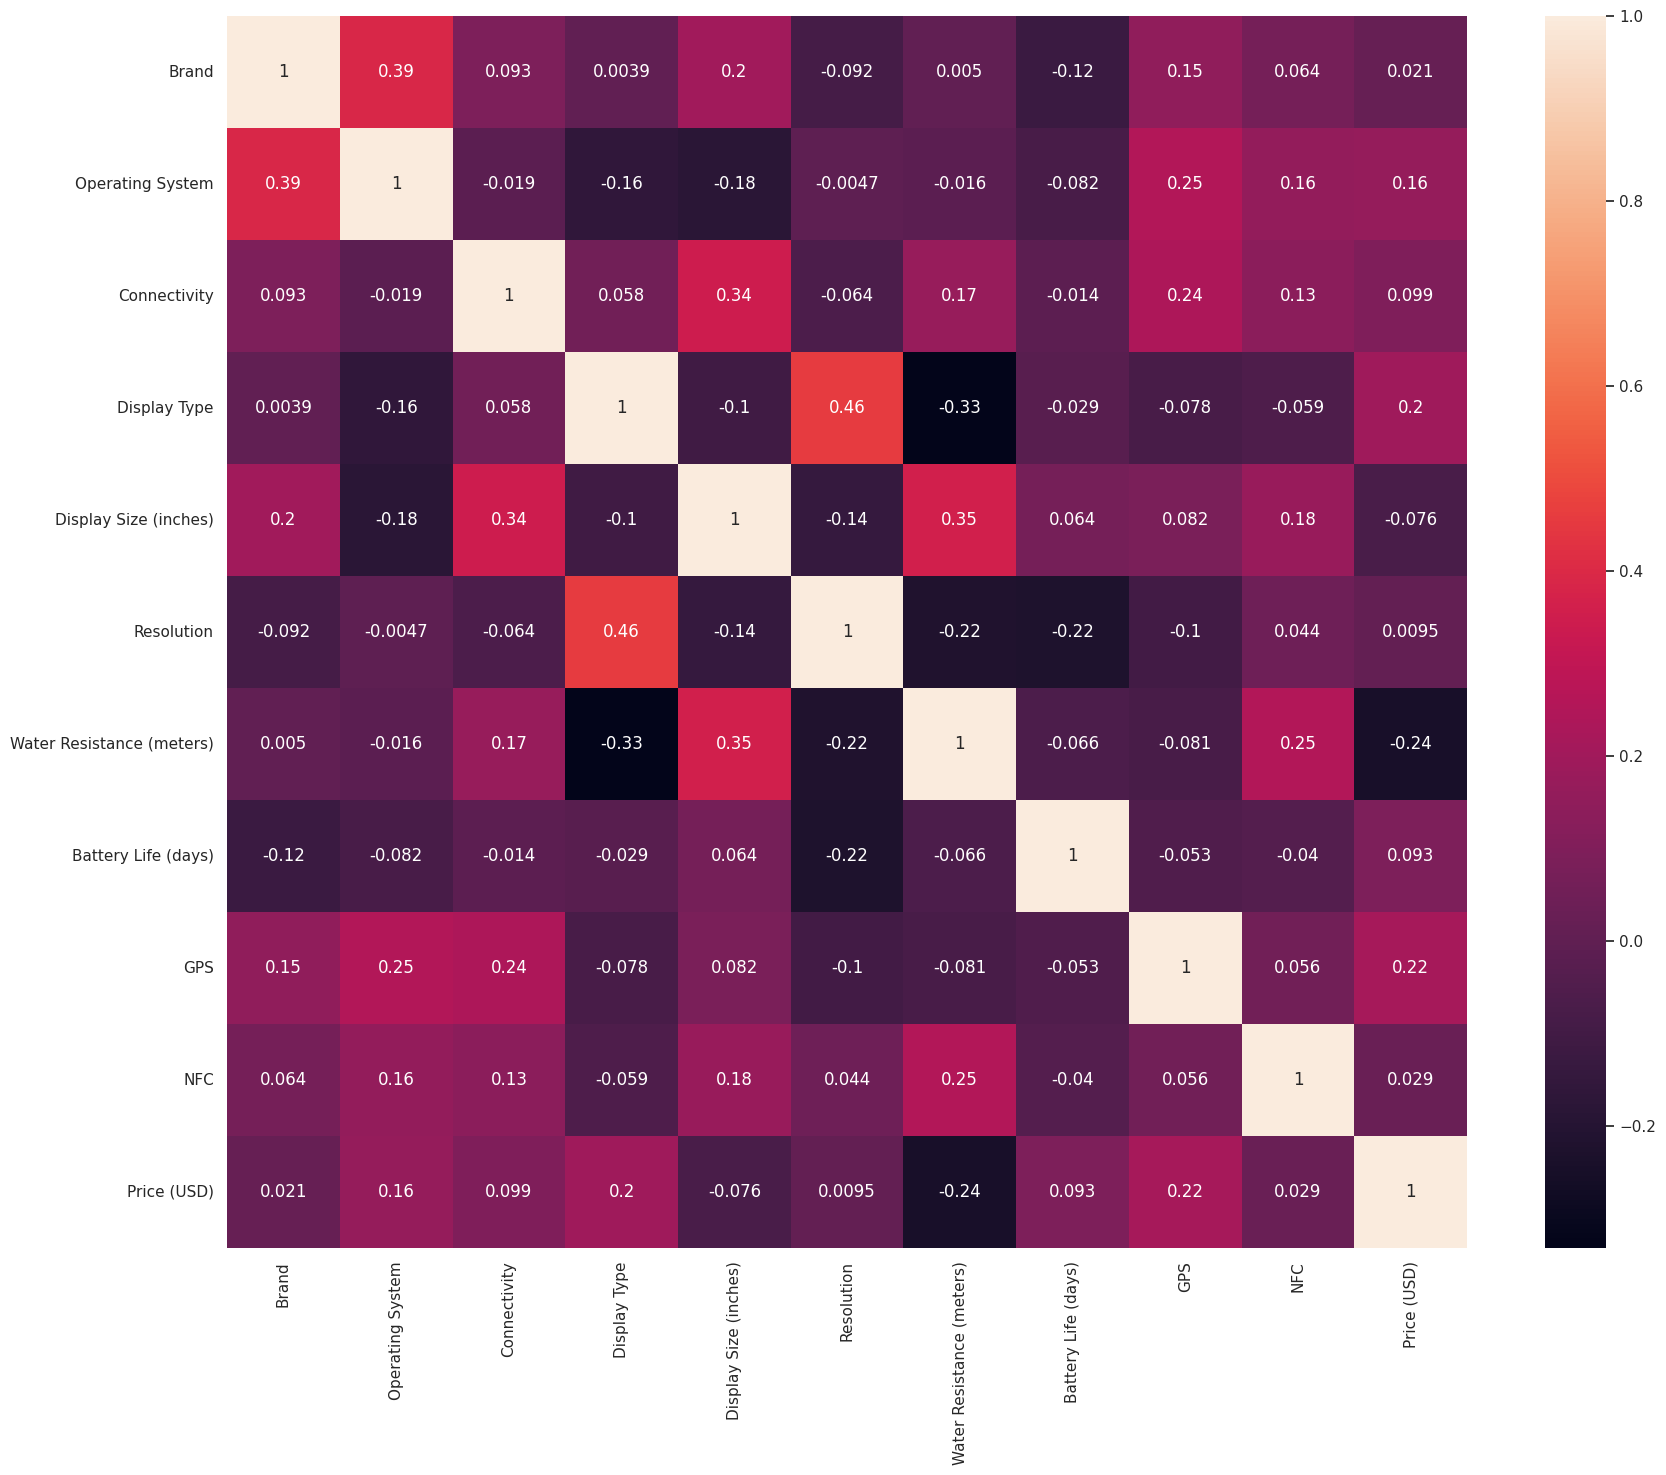

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True)

In [ ]:
df

,Brand,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),GPS,NFC,Price (USD)
0,5,4,2,6,1.90,2,3,1,1,1,399
1,6,9,2,0,1.40,0,3,3,1,1,249
2,2,2,1,0,1.30,0,3,1,1,0,399
3,5,1,1,0,1.58,2,3,0,1,1,229
4,1,9,1,0,1.28,0,2,2,1,1,299
...,...,...,...,...,...,...,...,...,...,...,...
371,5,9,1,0,1.28,0,2,0,1,1,350
372,5,9,1,2,1.20,2,1,0,1,0,699
374,5,4,1,5,1.38,2,3,2,0,1,279
377,5,4,1,0,1.64,2,3,1,0,1,159


# Train Test Split

In [ ]:
X = df_clean.drop('Price (USD)', axis=1)
y = df_clean['Price (USD)']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=6, max_features='auto', min_samples_leaf=1, min_samples_split=6)
dtree.fit(X_train, y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.


DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_split=6,
                      random_state=0)

In [ ]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 130.59672053952963
MSE is 93255.4513206002
R2 score is 0.055436877316184074
RMSE score is 305.37755536483064


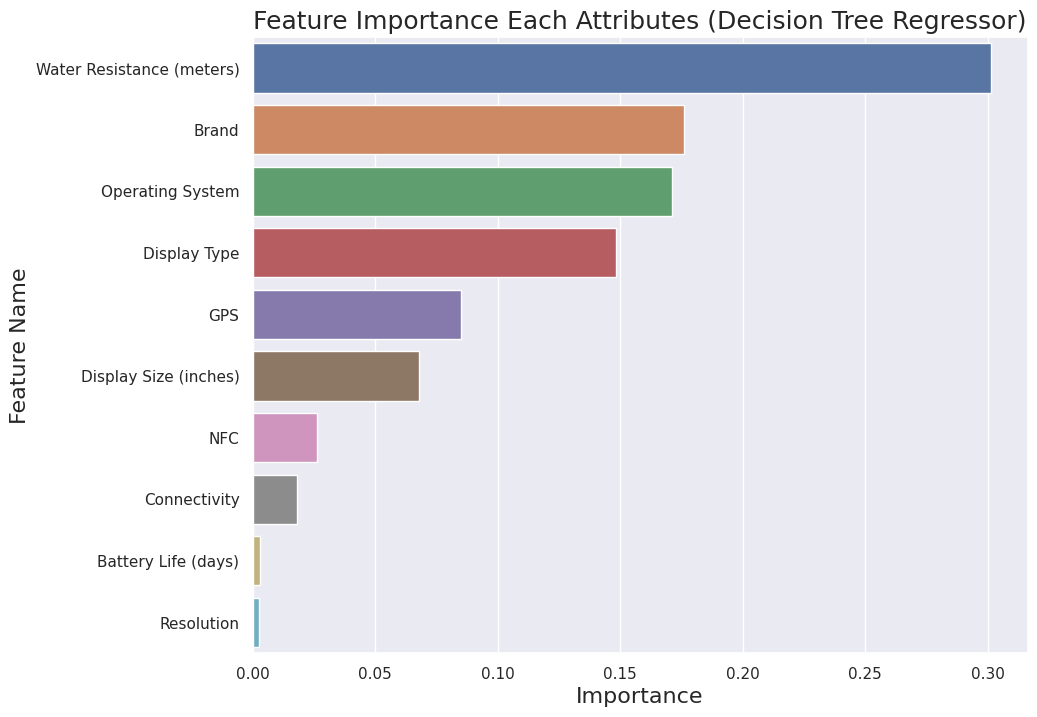

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

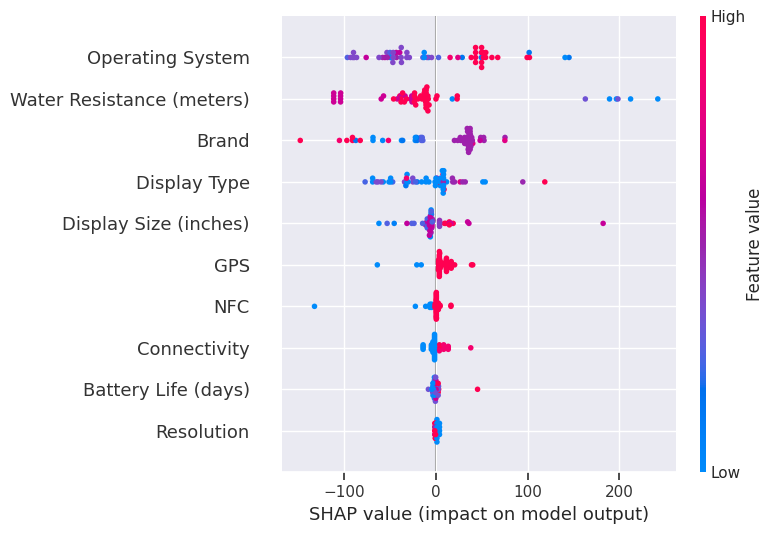

In [ ]:
# !pip install shap
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

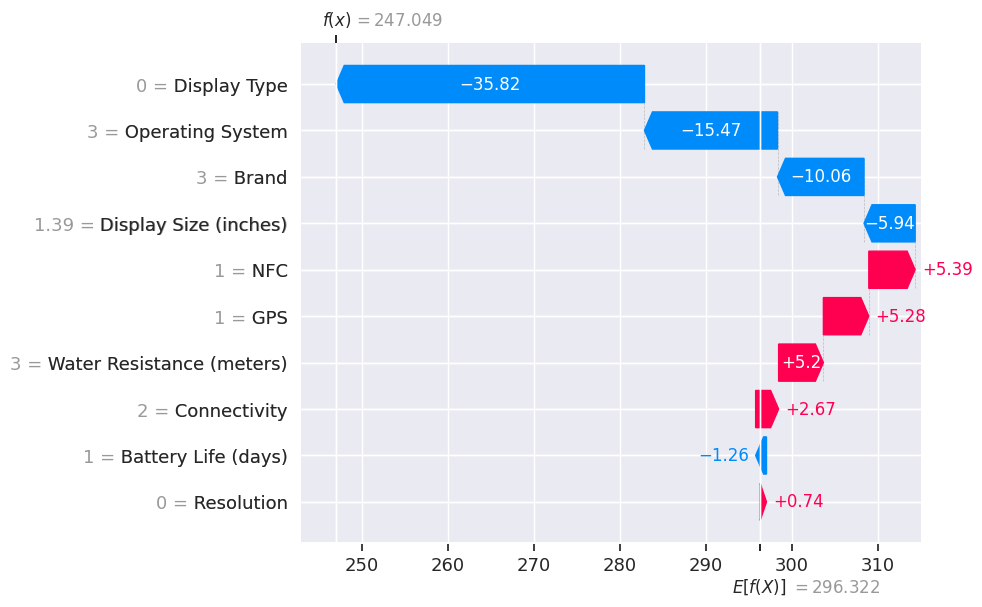

In [ ]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=7, min_samples_split=5, min_samples_leaf=2, 
                           max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 135.0561792014137
MAPE is 0.3219423159214738
MSE is 84782.54870331219
R2 score is 0.14125696870009152
RMSE score is 291.1744300300289


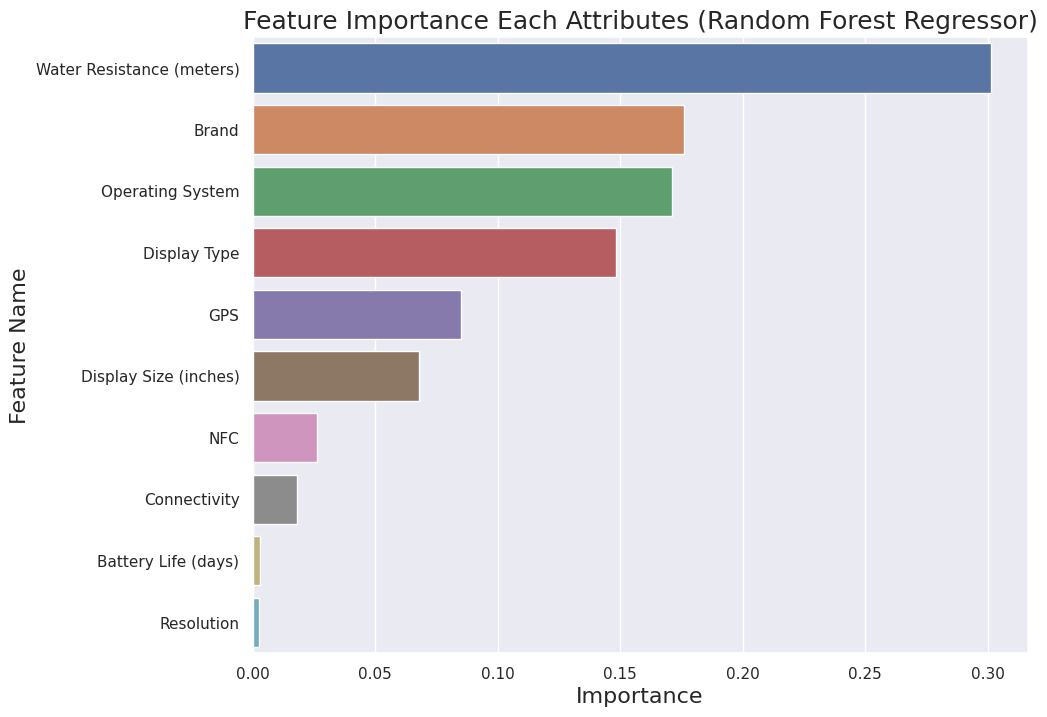

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


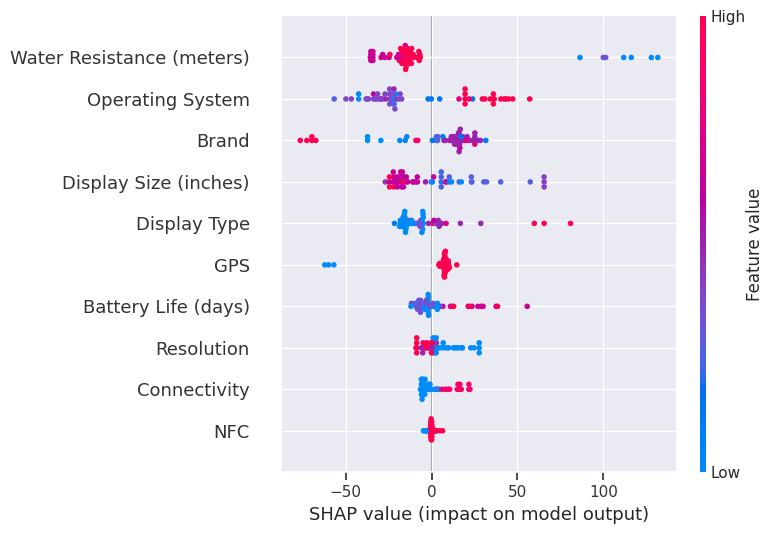

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

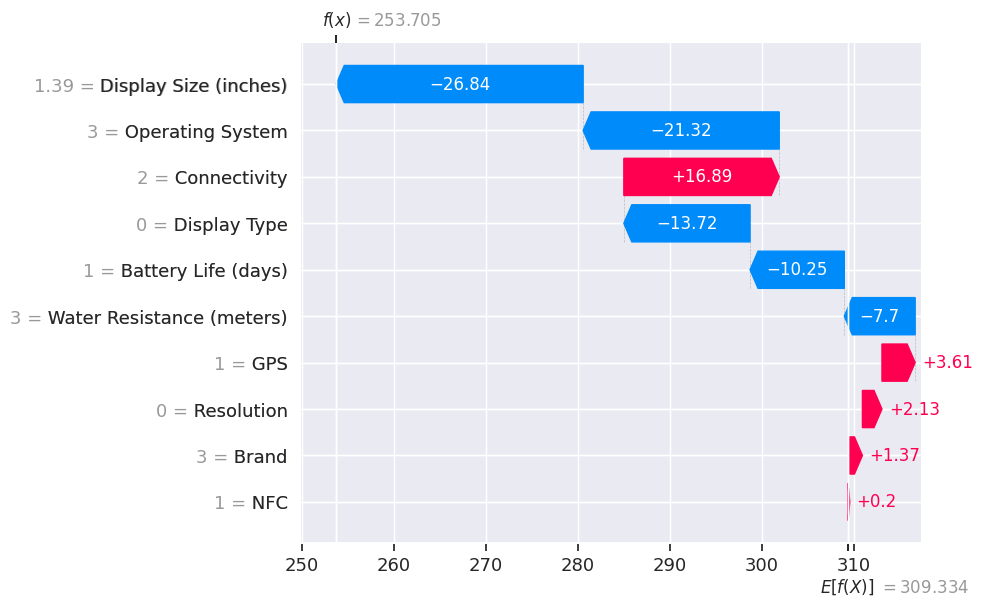

In [ ]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

# Imporoved Version

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Smart watch prices.csv')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop('Heart Rate Monitor', axis=1, inplace=True)

In [ ]:
y = df['Price (USD)']
df.drop(['Price (USD)'], axis=1, inplace=True)

In [ ]:
y = y.apply(lambda x : x.replace('$', ''))
y = y.apply(lambda x : x.replace(',', '')).astype(float)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
df_encoded = df.apply(lambda x: d[x.name].fit_transform(x))
df_encoded.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),GPS,NFC
0,1,125,33,2,16,27,27,5,8,1,1
1,30,35,30,2,0,17,31,5,16,1,1
2,8,103,9,1,0,10,30,5,3,1,0
3,6,107,7,1,0,21,19,5,22,1,1
4,7,42,30,1,0,9,30,4,11,1,1


In [ ]:
df2 = pd.concat([df_encoded, y], axis=1)
df2.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),GPS,NFC,Price (USD)
0,1,125,33,2,16,27,27,5,8,1,1,399.0
1,30,35,30,2,0,17,31,5,16,1,1,249.0
2,8,103,9,1,0,10,30,5,3,1,0,399.0
3,6,107,7,1,0,21,19,5,22,1,1,229.0
4,7,42,30,1,0,9,30,4,11,1,1,299.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_encoded,y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
model.score(x_train, y_train)

0.9275881588111837

In [ ]:
model.score(x_test, y_test)

0.8612151917570321

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_train_predict = model.predict(x_train)
mse=mean_squared_error(y_train, y_train_predict)
mae=mean_absolute_error(y_train, y_train_predict)
r2=r2_score(y_train, y_train_predict)
print('mean_squared_error', mse)
print('mean_absolute_error', mae)
print('r2_score', r2)

mean_squared_error 3098.4645989223372
mean_absolute_error 39.4759212565683
r2_score 0.9275881588111837


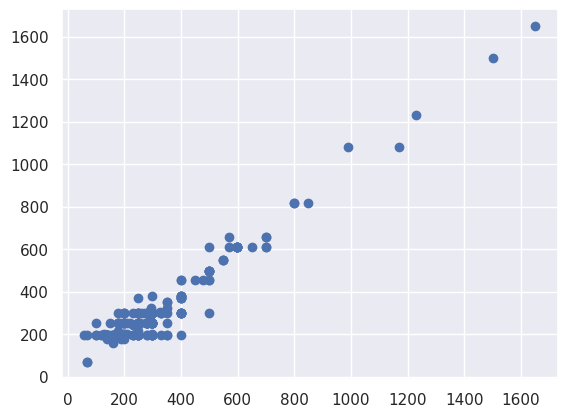

In [ ]:
plt.scatter(y_train, y_train_predict)
plt.show()

In [ ]:
y_test_predict = model.predict(x_test)
mse=mean_squared_error(y_test, y_test_predict)
mae=mean_absolute_error(y_test, y_test_predict)
r2=r2_score(y_test, y_test_predict)
print('mean_squared_error', mse)
print('mean_absolute_error', mae)
print('r2_score', r2)

mean_squared_error 9271.111372001576
mean_absolute_error 63.78930257906343
r2_score 0.8612151917570321


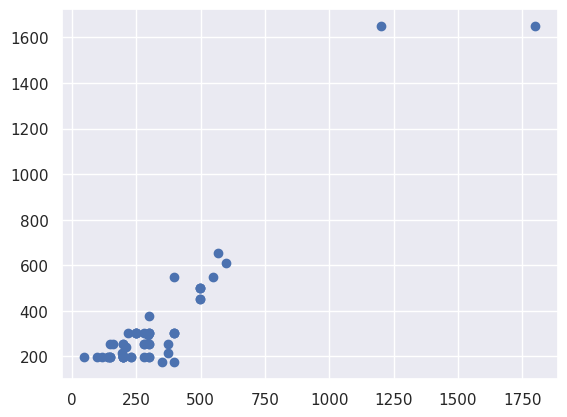

In [ ]:
plt.scatter(y_test, y_test_predict)
# plt.scatter(, edgecolors=(0, 0, 1))
plt.show()